**Mount Drive**

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')
print("Done!")

**IMPORT LIBRARIES**

In [ ]:
#@title
from collections import Counter
import pandas as pd
import re
import datetime
import numpy as np
import matplotlib.pyplot as plt
from dateutil import tz


print("Done!")

**Install Libraries**

In [ ]:
#@title
!pip install emoji --upgrade

**Import Installed Libraries**

In [ ]:
#@title
from emoji import UNICODE_EMOJI
print('Done!')

**Import Data File**

In [ ]:
#@title
with open('/content/drive/My Drive/Colab Notebooks/Data/_chat2.txt', 'r', encoding = 'utf-8') as file:
    data_lines = [line.strip() for line in file.read().splitlines()]
    data = pd.DataFrame(
        re.findall(r'\[(.*?),\s(.*?)]\s*([^:]+):\s*(.*)', '\n'.join(data_lines)),
        columns=['Date', 'Time', 'Author', 'Message']
    )
    
    print("Done!")

**Process documents**

In [ ]:
#@title
documents_list = data['Message'].apply(lambda x: str(re.findall('.*document omitted', x)))
documents_list = documents_list.to_frame()
documents = documents_list['Message'].unique()
documents = [doc for doc in documents if len(doc) > 2]
documents = [doc.split("\\u200")[0].strip()[2:] for doc in documents]
documents

**Big Analysis**

In [781]:
#@title
number_of_messages = data.shape[0]
number_of_pictures = data[data['Message'] == '‎image omitted'].shape[0]
number_of_videos = data[data['Message'] == '‎video omitted'].shape[0]
number_of_stickers = data[data['Message'] == '‎sticker omitted'].shape[0]
number_of_GIFs = data[data['Message'] == '‎GIF omitted'].shape[0]
number_of_documents = len(documents)
number_of_deleted_messages = data[data['Message'] == "‎This message was deleted."].shape[0] + data[data['Message'] == '‎You deleted this message.'].shape[0]

start_date = datetime.datetime.strptime(data['Date'][0], "%d/%m/%y").date()
end_date = datetime.datetime.strptime(data['Date'][number_of_messages - 1], "%d/%m/%y").date()

duration = end_date - start_date
duration = duration.days
days_chatted = data['Date'].unique().shape[0]
print('Chat data start and end dates:', start_date, ':', end_date, '(yyyy-mm-dd)')
print('Chat duration is: ', duration, 'days')
print('Active days:', days_chatted, '/', duration, 'or {:.2f}%'.format(days_chatted/duration*100) ,'days of duration')

print("\nThere are {} participants in this chat: ".format(data['Author'].unique().size))
names = [name for name in data['Author'].unique()]
for name in names:
    print(name)

df1 = data[data['Author'] == names[0]]
df2 = data[data['Author'] == names[1]]

number_text_message = number_of_messages - number_of_pictures - number_of_GIFs - number_of_videos - number_of_stickers - number_of_documents
number_text_message

print('\nThey sent a total of {:,} messages:'.format(number_of_messages))
print('\n{:,} of which were text messages, or {:.2f}% of the total {} messages.'.format(number_text_message,number_text_message/number_of_messages*100, number_of_messages))
print('{} of which were pictures, or {:.3f}% of the total {} messages.'.format(number_of_pictures,number_of_pictures/number_of_messages*100, number_of_messages))
print('{} of which were videos, or {:.3f}% of the total {} messages.'.format(number_of_videos,number_of_videos/number_of_messages*100, number_of_messages))
print('{} of which were GIFs, or {:.3f}% of the total {} messages.'.format(number_of_GIFs,number_of_GIFs/number_of_messages*100, number_of_messages))
print('{} of which were stickers, or {:.3f}% of the total {} messages.'.format(number_of_stickers,number_of_stickers/number_of_messages*100, number_of_messages))
print('{} of which were documents, or {:.3f}% of the total {} messages.'.format(number_of_documents,number_of_documents/number_of_messages*100, number_of_messages))
print('\n===The documents were:===')
for doc in documents:
    print(doc)

print('\nA total of {} messages sent were deleted, or {:.2f}% of the total {} messages.'.format(number_of_deleted_messages, number_of_deleted_messages/number_of_messages * 100, number_of_messages))

Chat data start and end dates: 2020-01-06 : 2020-10-11 (yyyy-mm-dd)
Chat duration is:  279 days
Active days: 178 / 279 or 63.80% days of duration

There are 2 participants in this chat: 
Shaw 🐣
Preetika Sastry

They sent a total of 46,198 messages:

45,589 of which were text messages, or 98.68% of the total 46198 messages.
496 of which were pictures, or 1.074% of the total 46198 messages.
45 of which were videos, or 0.097% of the total 46198 messages.
25 of which were GIFs, or 0.054% of the total 46198 messages.
40 of which were stickers, or 0.087% of the total 46198 messages.
3 of which were documents, or 0.006% of the total 46198 messages.

===The documents were:===
WhatsApp Chat - Shaw 🐣.zip
WPC 2_Final study material.pdf.pdf •
puzzles.pdf •

A total of 520 messages sent were deleted, or 1.13% of the total 46198 messages.


**Most Common Messages**

In [782]:
#@title
data['Number of Words'] = data['Message'].apply(lambda x: len(x.split()))
number_of_words = data['Number of Words'].sum()

document_words = [len(doc.split()) for doc in documents]
document_words = sum(document_words)

number_of_words = number_of_words - (number_of_pictures*2) - (number_of_GIFs*2) - (number_of_videos*2) - (number_of_stickers*2) - (number_of_documents*2) - document_words

print('They sent a total of {:,} words, for an average of {:.2f} words per (text only) message.'.format(number_of_words, number_of_words/number_text_message))


most_common_messages = pd.DataFrame(data.Message.value_counts())
most_common_messages.drop(['‎This message was deleted.','‎image omitted','‎You deleted this message.', '‎video omitted', '‎GIF omitted', '‎sticker omitted'], inplace=True)

print("\nThe 50 most common messages were:")
most_common_messages.head(50) #this is most common message

They sent a total of 211,396 words, for an average of 4.64 words per (text only) message.

The 50 most common messages were:


,Message
😂😂😂,294
😂😂,283
😂,206
😂😂😂😂,188
No,152
😂😂😂😂😂,115
Yes,100
Yup,100
Hehe,99
Mm hmm,85


**Most Common Words**

In [783]:
#@title
words = Counter()
data['Message'].str.lower().str.split().apply(words.update)

print("Top 100 most commonly used words:")
words.most_common(100)

Top 100 most commonly used words:


[('i', 8617),
 ('you', 5413),
 ('like', 4352),
 ('the', 4173),
 ('to', 4130),
 ('and', 3876),
 ('a', 3448),
 ('it', 3105),
 ('so', 2744),
 ('was', 2595),
 ('that', 2567),
 ('but', 2262),
 ('no', 1828),
 ('is', 1806),
 ('me', 1730),
 ('just', 1613),
 ('this', 1526),
 ('yeah', 1525),
 ('of', 1513),
 ('not', 1453),
 ('in', 1421),
 ('have', 1359),
 ('he', 1333),
 ('my', 1254),
 ('what', 1220),
 ('okay', 1180),
 ('for', 1171),
 ('be', 1148),
 ('do', 1108),
 ('i’m', 1096),
 ('with', 954),
 ('on', 917),
 ('are', 908),
 ('about', 877),
 ('oh', 866),
 ('it’s', 842),
 ('if', 829),
 ('really', 798),
 ('we', 789),
 ('can', 760),
 ('all', 747),
 ('don’t', 742),
 ('they', 731),
 ('him', 730),
 ('or', 725),
 ('ok', 716),
 ('your', 697),
 ('😂', 692),
 ('now', 680),
 ('why', 671),
 ('that’s', 668),
 ('get', 661),
 ('she', 655),
 ('would', 654),
 ('think', 653),
 ('how', 648),
 ('mean', 630),
 ('one', 628),
 ('too', 628),
 ('at', 622),
 ('omitted', 612),
 ('want', 611),
 ('then', 592),
 ('see', 582),
 (

**Get Emojis**

In [776]:
#@title
def get_emojis(string):
    return ''.join([ch for ch in string if ch in UNICODE_EMOJI])


emojis = Counter(data['Message'].apply(lambda x: get_emojis(x)).sum())
emojis = {k: v for k,v in sorted(emojis.items(), key=lambda item: item[1], reverse=True)}
print('There are {} unique emojis used in this chat.'.format(len(emojis)))
print('A total of {} emojis were used.'.format(sum(emojis.values())))

print('These are all the emojis used, sorted in reverse ascending order:\n')
for emoji,number in emojis.items():
    print(emoji, number)

There are 254 unique emojis used in this chat.
A total of 11248 emojis were used.
These are all the emojis used, sorted in reverse ascending order:

😂 9088
😭 332
♀ 173
🤦 138
🥺 109
🏼 104
🏻 88
👋 86
😒 63
😴 52
😞 44
🤷 42
😢 40
🤪 38
❤ 38
😊 36
😅 31
😑 27
😨 21
☺ 20
😬 20
👏 19
😓 19
☀ 18
😤 17
🎉 17
😁 16
♂ 16
👍 14
🎊 14
🤮 14
😈 11
🥰 11
💖 11
🤣 10
🍪 10
🙄 9
👌 9
😏 9
😌 8
😡 8
💔 8
😖 8
😔 8
😍 7
🥳 7
🚬 7
😇 6
😄 6
💤 6
😐 6
😪 5
🤎 5
😎 5
🙋 5
⬆ 5
🤭 5
😩 5
😋 5
🤧 5
🥴 4
🐣 4
😠 4
💦 4
‼ 4
😣 4
💓 4
🙈 4
🇺 4
🇸 4
🍐 4
🥭 4
😚 3
😘 3
✨ 3
🔫 3
🎈 3
🤝 3
🤢 3
🤯 3
🍇 3
🍍 3
🍓 3
🍡 2
💰 2
🦠 2
🍳 2
🙃 2
😉 2
🙇 2
😧 2
🍾 2
🕛 2
🤖 2
🧟 2
🍂 2
🦥 2
🍯 2
♾ 2
😶 2
💜 2
😃 2
😱 2
🤐 2
☹ 2
🌼 2
🍒 2
🍊 2
🍎 2
🕊 2
🍫 2
😕 2
😰 2
🌳 2
🌈 2
👎 1
🧀 1
🕉 1
🍰 1
🇨 1
🇦 1
🦷 1
👐 1
🍹 1
🧠 1
⭐ 1
👀 1
🥨 1
🐊 1
🙁 1
😗 1
😙 1
🔥 1
🧐 1
😮 1
🌬 1
☃ 1
🙅 1
☎ 1
🕧 1
🕐 1
🕜 1
🕑 1
🕝 1
🕒 1
🕞 1
🕓 1
🕟 1
🕔 1
🕠 1
🕕 1
🕡 1
🕖 1
🕢 1
🕗 1
🕣 1
🕘 1
🕤 1
🕙 1
🕥 1
🕚 1
🕦 1
🤗 1
🏫 1
🛑 1
🚀 1
🇪 1
🇬 1
🗼 1
🦄 1
🐒 1
🚿 1
🌊 1
🐦 1
🎨 1
🗺 1
👩 1
🦰 1
☕ 1
❇ 1
🧸 1
🥶 1
🦋 1
🦚 1
❗ 1
🦅 1
😵 1
🧇 1
🥱 1
🦧 1
😫 1
🥜 1
🎩 1
📺 1
🤔 1
🤤 1
🤙 1
🍏 1
🍋 1
🥝 1
🍅 1
🍦 1


**Get Letters**

In [777]:
#@title
data_as_string = data['Message'].str

avg_char = data_as_string.len().mean()
characters = data_as_string.len().sum() - 77 #fix 

doc_lengths = [len(doc) for doc in documents]
chars_in_docs = 0
for i in doc_lengths:
    chars_in_docs += i
characters -= chars_in_docs

print('A total of {:,} characters were sent'.format(characters))
print('Each message sent had an average of {:.2f} characters'.format(avg_char))

def get_chars(string):
    return ''.join([ch for ch in string if ch not in UNICODE_EMOJI])

letters = Counter(data['Message'].apply(lambda x: get_chars(x)).sum())
letters = {k: v for k,v in sorted(letters.items(), key=lambda item: item[1], reverse=True)}
print('There are {} unique characters used in this chat.'.format(len(letters)))

print('These are all the characters used, sorted in reverse ascending order:\n')
for emoji,number in letters.items():
    print(emoji, number)

A total of 1,046,426 characters were sent
Each message sent had an average of 22.65 characters
There are 117 unique characters used in this chat.
These are all the characters used, sorted in reverse ascending order:

  166478
e 93651
t 71498
o 65250
a 63732
i 51028
n 48793
s 48165
h 46543
l 34042
r 33332
d 29842
u 28870
y 25759
m 23134
w 19402
g 18739
k 15969
c 15625
I 12955
p 12076
f 11666
b 10653
’ 7531
v 7277
O 4682
A 4643
T 4480
! 4242
Y 4082
? 3641
S 3416
' 3091
H 3031
E 2863
W 2811
N 2716
L 2562
j 2403
B 2114
M 1443
. 1428
D 1308
U 1253
R 1245
x 1191
‎ 1135
G 929
C 907
P 767
F 758
, 721
/ 689
0 669
1 634
* 599
K 574
z 494
2 492
J 410
3 354
q 351
5 320
: 319
4 313
V 285
8 280
9 263
️ 261
- 243
6 241
7 227
= 196
‍ 191
" 144
‘ 121
& 103
) 78
X 75
( 70
Z 62
“ 53
_ 50
Q 46
% 44
” 42
+ 26
$ 19
^ 17
é 14
; 11
# 9
> 7
ʇ 6
ɐ 5
à 5
@ 5
< 4
ǝ 4
ɥ 4
• 4
ן 3
ɹ 3
₹ 3
~ 3
À 2
ı 1
ʎ 1
ɔ 1
¢ 1
ü 1
` 1
ê 1
≈ 1
¡ 1
è 1
– 1


**Person 1 Analysis**

In [784]:
#@title
documents_list_df1 = df1['Message'].apply(lambda x: str(re.findall('.*document omitted', x)))
documents_list_df1 = documents_list_df1.to_frame()
documents_df1 = documents_list_df1['Message'].unique()
documents_df1 = [doc for doc in documents_df1 if len(doc) > 2]
documents_df1 = [doc.split("\\u200")[0].strip()[2:] for doc in documents_df1]

number_of_messages_df1 = df1.shape[0]
number_of_pictures_df1 = df1[df1['Message'] == '‎image omitted'].shape[0]
number_of_videos_df1 = df1[df1['Message'] == '‎video omitted'].shape[0]
number_of_stickers_df1 = df1[df1['Message'] == '‎sticker omitted'].shape[0]
number_of_GIFs_df1 = df1[df1['Message'] == '‎GIF omitted'].shape[0]
number_of_documents_df1 = len(documents_df1)
number_of_deleted_messages_df1 = df1[df1['Message'] == '‎This message was deleted.'].shape[0] +  df1[df1['Message'] == '‎You deleted this message.'].shape[0]

number_text_message_df1 = number_of_messages_df1 - number_of_pictures_df1 - number_of_GIFs_df1 - number_of_videos_df1 - number_of_stickers_df1 - number_of_documents_df1

print(names[0], 'has sent: {} messages, or {:.2f}% of the total {} messages.'.format(number_of_messages_df1, number_of_messages_df1/number_of_messages*100, data.shape[0]))
print('\n{:,} of which were text messages, or {:.2f}% of the total {} text messages.'.format(number_text_message_df1, number_of_messages_df1/number_text_message*100, number_text_message))
print('{} of which were pictures, or {:.2f}% of the total {} pictures.'.format(number_of_pictures_df1, number_of_pictures_df1/number_of_pictures*100, number_of_pictures))

print('{} of which were videos, or {:.2f}% of the total {} videos.'.format(number_of_videos_df1, number_of_videos_df1/number_of_videos*100, number_of_videos))
print('{} of which were GIFs, or {:.2f}% of the total {} GIFs.'.format(number_of_GIFs_df1, number_of_GIFs_df1/number_of_GIFs*100, number_of_GIFs))
print('{} of which were stickers, or {:.2f}% of the total {} stickers.'.format(number_of_stickers_df1, number_of_stickers_df1/number_of_stickers*100, number_of_stickers))
print('{} of which were documents, or {:.2f}% of the total {} documents.'.format(number_of_documents_df1, number_of_documents_df1/number_of_documents*100, number_of_documents))
print('\n===The documents were:===')
for doc in documents_df1:
    print(doc)
print("")
print(names[0],'deleted {} messages, or {:.2f}% of the total {} deleted messages.'.format(number_of_deleted_messages_df1, number_of_deleted_messages_df1/number_of_deleted_messages * 100, number_of_deleted_messages))

number_of_words_df1 = df1['Number of Words'].sum()

document_words_df1 = [len(doc.split()) for doc in documents_df1]
document_words_df1 = sum(document_words_df1)

number_of_words_df1 = number_of_words_df1 - (number_of_pictures_df1*2) - (number_of_GIFs_df1*2) - (number_of_videos_df1*2) - (number_of_stickers_df1*2) - (number_of_documents_df1*2) - document_words_df1

print("")
print(names[0], 'has sent: {:,} words, or {:.2f}% of the total {} words.'.format(number_of_words_df1, number_of_words_df1/number_of_words*100, number_of_words))
print(names[0], 'sends about {:.2f} words per message.'.format(number_of_words_df1/number_text_message_df1))

data_as_string_df1 = df1['Message'].str

avg_char_df1 = data_as_string_df1.len().mean()
characters_df1 = data_as_string_df1.len().sum() - 77 #fix

doc_lengths_df1 = [len(doc) for doc in documents_df1]
chars_in_docs_df1 = 0
for i in doc_lengths_df1:
    chars_in_docs_df1 += i
characters_df1 -= chars_in_docs_df1

print("")
print(names[0],'sent a total of {:,} characters, or {:.2f}% of the total {} characters.'.format(characters_df1, characters_df1/characters*100, characters))
print('Each message sent had an average of {:.2f} characters'.format(avg_char_df1))

Shaw 🐣 has sent: 20781 messages, or 44.98% of the total 46198 messages.

20,520 of which were text messages, or 45.58% of the total 45589 text messages.
182 of which were pictures, or 36.69% of the total 496 pictures.
25 of which were videos, or 55.56% of the total 45 videos.
19 of which were GIFs, or 76.00% of the total 25 GIFs.
34 of which were stickers, or 85.00% of the total 40 stickers.
1 of which were documents, or 33.33% of the total 3 documents.

===The documents were:===
puzzles.pdf •

Shaw 🐣 deleted 472 messages, or 90.77% of the total 520 deleted messages.

Shaw 🐣 has sent: 99,573 words, or 47.10% of the total 211396 words.
Shaw 🐣 sends about 4.85 words per message.

Shaw 🐣 sent a total of 498,789 characters, or 47.67% of the total 1046426 characters.
Each message sent had an average of 24.01 characters


**Person 1 Messages**

In [785]:
#@title
most_common_messages_df1 = pd.DataFrame(df1.Message.value_counts())
most_common_messages_df1.drop(['‎This message was deleted.','‎image omitted', '‎video omitted', '‎GIF omitted', '‎sticker omitted'], inplace=True)

print("\nThe 25 most common messages for {} were:".format(names[0]))
most_common_messages_df1.head(25)


The 25 most common messages for Shaw 🐣 were:


,Message
😂😂😂,118
😂😂,90
😂😂😂😂,58
hehe,57
?,47
f,45
k,42
Hehe,42
😂,42
No,40


**Person 1 Words**

In [786]:
#@title
words_df1 = Counter()
df1['Message'].str.lower().str.split().apply(words_df1.update)

print("Top 50 most commonly used words for {}:".format(names[0]))
words_df1.most_common(50)

Top 50 most commonly used words for Shaw 🐣:


[('i', 3682),
 ('you', 2785),
 ('like', 2278),
 ('the', 2063),
 ('to', 1821),
 ('and', 1741),
 ('a', 1629),
 ('was', 1537),
 ('it', 1465),
 ('that', 1261),
 ('but', 1096),
 ('so', 1092),
 ('no', 990),
 ('is', 832),
 ('yeah', 820),
 ('in', 758),
 ('ok', 713),
 ('not', 643),
 ('of', 639),
 ('just', 637),
 ('this', 623),
 ('what', 613),
 ('me', 579),
 ('my', 546),
 ('for', 519),
 ('have', 516),
 ('be', 508),
 ('message', 484),
 ('he', 478),
 ('\u200ethis', 472),
 ('deleted.', 472),
 ('do', 464),
 ('or', 444),
 ('on', 438),
 ('with', 419),
 ('about', 417),
 ('oh', 401),
 ('can', 394),
 ('if', 392),
 ('really', 377),
 ('your', 374),
 ('are', 362),
 ("don't", 361),
 ("that's", 358),
 ("it's", 358),
 ('mean', 357),
 ('😂', 355),
 ('we', 352),
 ("i'm", 346),
 ('think', 345)]

**Person 1 Emojis**

In [787]:
#@title
emojis_df1 = Counter(df1['Message'].apply(lambda x: get_emojis(x)).sum())
emojis_df1 = {k: v for k,v in sorted(emojis_df1.items(), key=lambda item: item[1], reverse=True)}
print(names[0],'used {} unique emojis in this chat.'.format(len(emojis_df1)))
print(names[0], 'used a total of {} emojis'.format(sum(emojis_df1.values())))

print('These are all the emojis used, sorted in reverse ascending order:\n')
for emoji,number in emojis_df1.items():
    print(emoji, number)

Shaw 🐣 used 214 unique emojis in this chat.
Shaw 🐣 used a total of 3551 emojis
These are all the emojis used, sorted in reverse ascending order:

😂 2722
♀ 86
🤦 68
😭 61
🤪 37
😅 31
🤷 29
😊 25
🥺 25
☀ 18
😢 17
♂ 16
😑 15
😒 13
😈 11
😞 10
👋 9
😏 9
😁 8
🤮 8
👏 7
🙄 7
😡 7
👍 7
🚬 7
😇 6
😄 6
💤 6
🤣 6
😐 6
🥳 6
😎 5
💔 5
❤ 5
🤭 5
😋 5
☺ 4
😤 4
🥰 4
💦 4
🇺 4
🇸 4
🙋 3
😠 3
‼ 3
😖 3
🎈 3
😩 3
🍡 2
💰 2
🦠 2
🍳 2
🙃 2
😉 2
😘 2
🍾 2
🕛 2
🤖 2
🧟 2
🍂 2
♾ 2
😶 2
😃 2
😓 2
🙈 2
🤝 2
😬 2
✨ 2
☹ 2
🌼 2
🕊 2
😕 2
😰 2
🌳 2
🌈 2
🎉 2
🤯 2
👎 1
🕉 1
🍰 1
🇨 1
🇦 1
🦷 1
👐 1
🧠 1
⭐ 1
👀 1
🐊 1
🙁 1
😗 1
😙 1
😚 1
🥴 1
🔥 1
🧐 1
🌬 1
☃ 1
🙅 1
😧 1
🔫 1
🕧 1
🕐 1
🕜 1
🕑 1
🕝 1
🕒 1
🕞 1
🕓 1
🕟 1
🕔 1
🕠 1
🕕 1
🕡 1
🕖 1
🕢 1
🕗 1
🕣 1
🕘 1
🕤 1
🕙 1
🕥 1
🕚 1
🕦 1
🤗 1
🏫 1
🛑 1
🚀 1
🇪 1
🇬 1
🗼 1
🦄 1
🐒 1
🚿 1
🌊 1
🐦 1
🎨 1
🗺 1
👩 1
🏻 1
🦰 1
❇ 1
🧸 1
🥶 1
🦋 1
❗ 1
😔 1
🐣 1
🦅 1
😵 1
🥱 1
🦧 1
🥜 1
📺 1
🤔 1
🤤 1
🤙 1
🤫 1
😪 1
🤩 1
☠ 1
👿 1
🤢 1
👽 1
😥 1
🌵 1
🎄 1
🌲 1
🌴 1
🌱 1
🌿 1
☘ 1
🍀 1
🎍 1
🎋 1
🍃 1
🍄 1
🐚 1
🌾 1
💐 1
🌷 1
🌹 1
🥀 1
🌺 1
🌸 1
🌻 1
🌞 1
🌤 1
⛅ 1
🌥 1
🌦 1
🌧 1
⛈ 1
☔ 1
🏳 1
🌨 1
❄ 1
💉 1
🍎 1
🥭 1
🍪 1
🌮 1
🔪 1
🩸 1
🍫 1
🍬 1
🍭 1
🙌 1
🎊 1
🥂 1


**Person 2 Analysis**

In [788]:
#@title
documents_list_df2 = df2['Message'].apply(lambda x: str(re.findall('.*document omitted', x)))
documents_list_df2 = documents_list_df2.to_frame()
documents_df2 = documents_list_df2['Message'].unique()
documents_df2 = [doc for doc in documents_df2 if len(doc) > 2]
documents_df2 = [doc.split("\\u200")[0].strip()[2:] for doc in documents_df2]

number_of_messages_df2 = df2.shape[0]
number_of_pictures_df2 = df2[df2['Message'] == '‎image omitted'].shape[0]
number_of_videos_df2 = df2[df2['Message'] == '‎video omitted'].shape[0]
number_of_stickers_df2 = df2[df2['Message'] == '‎sticker omitted'].shape[0]
number_of_GIFs_df2 = df2[df2['Message'] == '‎GIF omitted'].shape[0]
number_of_documents_df2 = len(documents_df2)
number_of_deleted_messages_df2 = df2[df2['Message'] == '‎This message was deleted.'].shape[0] + df2[df2['Message'] == '‎You deleted this message.'].shape[0]


number_text_message_df2 = number_of_messages_df2 - number_of_pictures_df2 - number_of_GIFs_df2 - number_of_videos_df2 - number_of_stickers_df2 - number_of_documents_df2

print(names[1], 'has sent: {} messages, or {:.2f}% of the total {} messages.'.format(number_of_messages_df2, number_of_messages_df2/number_of_messages*100, data.shape[0]))
print('\n{:,} of which were text messages, or {:.2f}% of the total {} text messages.'.format(number_text_message_df2, number_of_messages_df2/number_text_message*100, number_text_message))
print('{} of which were pictures, or {:.2f}% of the total {} pictures.'.format(number_of_pictures_df2, number_of_pictures_df2/number_of_pictures*100, number_of_pictures))

print('{} of which were videos, or {:.2f}% of the total {} videos.'.format(number_of_videos_df2, number_of_videos_df2/number_of_videos*100, number_of_videos))
print('{} of which were GIFs, or {:.2f}% of the total {} GIFs.'.format(number_of_GIFs_df2, number_of_GIFs_df2/number_of_GIFs*100, number_of_GIFs))
print('{} of which were stickers, or {:.2f}% of the total {} stickers.'.format(number_of_stickers_df2, number_of_stickers_df2/number_of_stickers*100, number_of_stickers))
print('{} of which were documents, or {:.2f}% of the total {} documents.'.format(number_of_documents_df2, number_of_documents_df2/number_of_documents*100, number_of_documents))
print('\n===The documents were:===')
for doc in documents_df2:
    print(doc)
print("")
print(names[1],'deleted {} messages, or {:.2f}% of the total {} deleted messages.'.format(number_of_deleted_messages_df2, number_of_deleted_messages_df2/number_of_deleted_messages * 100, number_of_deleted_messages))

number_of_words_df2 = df2['Number of Words'].sum()

document_words_df2 = [len(doc.split()) for doc in documents_df2]
document_words_df2 = sum(document_words_df2)

number_of_words_df2 = number_of_words_df2 - (number_of_pictures_df2*2) - (number_of_GIFs_df2*2) - (number_of_videos_df2*2) - (number_of_stickers_df2*2) - (number_of_documents_df2*2) - document_words_df2

print("")
print(names[1], 'has sent: {:,} words, or {:.2f}% of the total {} words.'.format(number_of_words_df2, number_of_words_df2/number_of_words*100, number_of_words))
print(names[1], 'sends about {:.2f} words per message.'.format(number_of_words_df2/number_text_message_df2))

data_as_string_df2 = df2['Message'].str

avg_char_df2 = data_as_string_df2.len().mean()
characters_df2 = data_as_string_df2.len().sum() - 77 #fix

doc_lengths_df2 = [len(doc) for doc in documents_df2]
chars_in_docs_df2 = 0
for i in doc_lengths_df2:
    chars_in_docs_df2 += i
characters_df2 -= chars_in_docs_df2

print("")
print(names[1],'sent a total of {:,} characters, or {:.2f}% of the total {} characters.'.format(characters_df2, characters_df2/characters*100, characters))
print('Each message sent had an average of {:.2f} characters'.format(avg_char_df2))

Preetika Sastry has sent: 25417 messages, or 55.02% of the total 46198 messages.

25,069 of which were text messages, or 55.75% of the total 45589 text messages.
314 of which were pictures, or 63.31% of the total 496 pictures.
20 of which were videos, or 44.44% of the total 45 videos.
6 of which were GIFs, or 24.00% of the total 25 GIFs.
6 of which were stickers, or 15.00% of the total 40 stickers.
2 of which were documents, or 66.67% of the total 3 documents.

===The documents were:===
WhatsApp Chat - Shaw 🐣.zip
WPC 2_Final study material.pdf.pdf •

Preetika Sastry deleted 48 messages, or 9.23% of the total 520 deleted messages.

Preetika Sastry has sent: 111,823 words, or 52.90% of the total 211396 words.
Preetika Sastry sends about 4.46 words per message.

Preetika Sastry sent a total of 547,560 characters, or 52.33% of the total 1046426 characters.
Each message sent had an average of 21.55 characters


**Person 2 Messages**

In [789]:
#@title
most_common_messages_df2 = pd.DataFrame(df2.Message.value_counts())
most_common_messages_df2.drop(['‎You deleted this message.','‎image omitted', '‎video omitted', '‎GIF omitted', '‎sticker omitted'], inplace=True)

print("\nThe 25 most common messages for {} were:".format(names[1]))
most_common_messages_df2.head(25)


The 25 most common messages for Preetika Sastry were:


,Message
😂😂,193
😂😂😂,176
😂,164
😂😂😂😂,130
No,112
😂😂😂😂😂,96
Mm hmm,85
Yup,85
Yes,81
Okay,57


**Person 2 Words**

In [790]:
#@title
words_df2 = Counter()
df2['Message'].str.lower().str.split().apply(words_df2.update)

print("Top 50 most commonly used words for {}:".format(names[1]))
words_df2.most_common(50)

Top 50 most commonly used words for Preetika Sastry:


[('i', 4935),
 ('you', 2628),
 ('to', 2309),
 ('and', 2135),
 ('the', 2110),
 ('like', 2074),
 ('a', 1819),
 ('so', 1652),
 ('it', 1640),
 ('that', 1306),
 ('but', 1166),
 ('me', 1151),
 ('was', 1058),
 ('okay', 992),
 ('just', 976),
 ('is', 974),
 ('this', 903),
 ('of', 874),
 ('he', 855),
 ('have', 843),
 ('no', 838),
 ('not', 810),
 ('i’m', 810),
 ('my', 708),
 ('yeah', 705),
 ('in', 663),
 ('for', 652),
 ('do', 644),
 ('be', 640),
 ('what', 607),
 ('it’s', 604),
 ('are', 546),
 ('with', 535),
 ('don’t', 530),
 ('on', 479),
 ('him', 468),
 ('oh', 465),
 ('about', 460),
 ('that’s', 460),
 ('if', 437),
 ('we', 437),
 ('all', 429),
 ('they', 424),
 ('really', 421),
 ('would', 405),
 ('she', 399),
 ('want', 393),
 ('now', 391),
 ('at', 383),
 ('how', 376)]

**Person 2 Emojis**

In [791]:
#@title
emojis_df2 = Counter(df2['Message'].apply(lambda x: get_emojis(x)).sum())
emojis_df2 = {k: v for k,v in sorted(emojis_df2.items(), key=lambda item: item[1], reverse=True)}
print(names[1],'used {} unique emojis in this chat.'.format(len(emojis_df2)))
print(names[1], 'used a total of {} emojis'.format(sum(emojis_df2.values())))

print('These are all the emojis used, sorted in reverse ascending order:\n')
for emoji,number in emojis_df2.items():
    print(emoji, number)

Preetika Sastry used 93 unique emojis in this chat.
Preetika Sastry used a total of 7697 emojis
These are all the emojis used, sorted in reverse ascending order:

😂 6366
😭 271
🏼 104
🏻 87
♀ 87
🥺 84
👋 77
🤦 70
😴 52
😒 50
😞 34
❤ 33
😢 23
😨 21
😬 18
😓 17
☺ 16
🎉 15
😤 13
🤷 13
🎊 13
👏 12
😑 12
😊 11
💖 11
👌 9
🍪 9
😁 8
😌 8
😍 7
👍 7
😔 7
🥰 7
🤮 6
🤎 5
⬆ 5
😖 5
🤧 5
😪 4
🤣 4
😣 4
💓 4
🍐 4
🥴 3
🐣 3
💔 3
🍇 3
🍍 3
🍓 3
🥭 3
🙄 2
🙇 2
🙋 2
😚 2
🦥 2
🍯 2
💜 2
😱 2
🙈 2
🤐 2
🤢 2
😩 2
🍒 2
🍊 2
🔫 2
🧀 1
🍹 1
🥨 1
😮 1
✨ 1
☎ 1
🥳 1
☕ 1
🤪 1
🦚 1
😠 1
🤝 1
🧇 1
😫 1
😘 1
🎩 1
😡 1
🤯 1
🍏 1
🍋 1
🥝 1
🍅 1
🍎 1
‼ 1
🍦 1
🍫 1
🥔 1
😧 1


**VISUALIZATIONS**

*Prepare and Process Data*

In [792]:
#@title
data['Message Length'] = data['Message'].str.len()

In [793]:
#@title
data['Date'] = [datetime.datetime.strptime(date, "%d/%m/%y").date() for date in data['Date']]

In [794]:
#@title
data['Time'] = [datetime.datetime.strptime(time, "%I:%M:%S %p").time() for time in data['Time']]

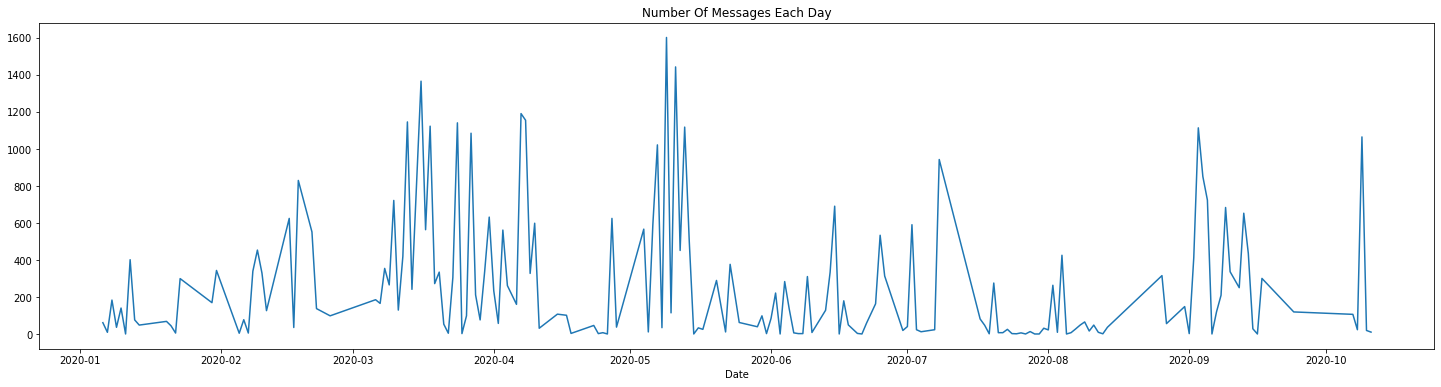

In [795]:
#@title
data.groupby(['Date']).size().plot(figsize=(25,6), title='Number Of Messages Each Day')

In [796]:
#@title
min_messages_date = data.groupby(['Date']).size().idxmin()
min_messages = data.groupby(['Date']).size().min()
print('On',min_messages_date,'was the lowest number of messages sent, which was:',min_messages)

max_messages_date = data.groupby(['Date']).size().idxmax()
max_messages = data.groupby(['Date']).size().max()
print('On',max_messages_date,'was the highest number of messages sent, which was:',max_messages)

On 2020-01-11 was the lowest number of messages sent, which was: 1
On 2020-05-09 was the highest number of messages sent, which was: 1602


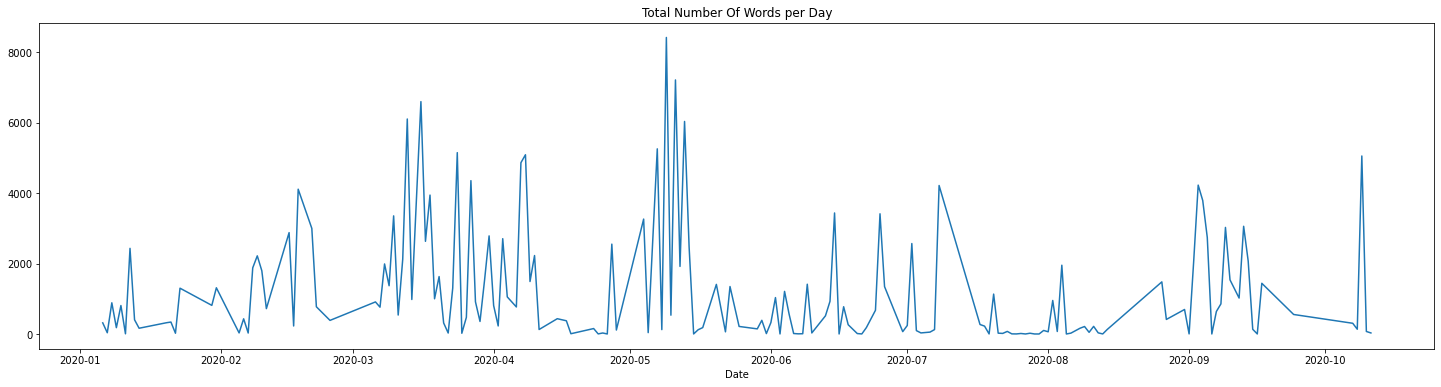

In [797]:
#@title
data.groupby('Date')['Number of Words'].sum().plot(figsize=(25,6), title='Total Number Of Words per Day')

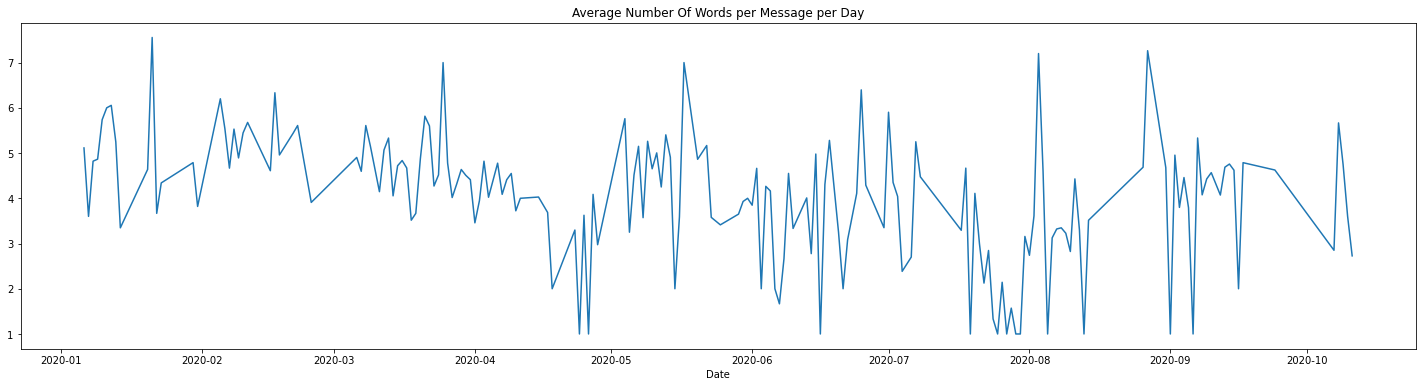

In [798]:
#@title
data.groupby('Date')['Number of Words'].mean().plot(figsize=(25,6), title='Average Number Of Words per Message per Day')

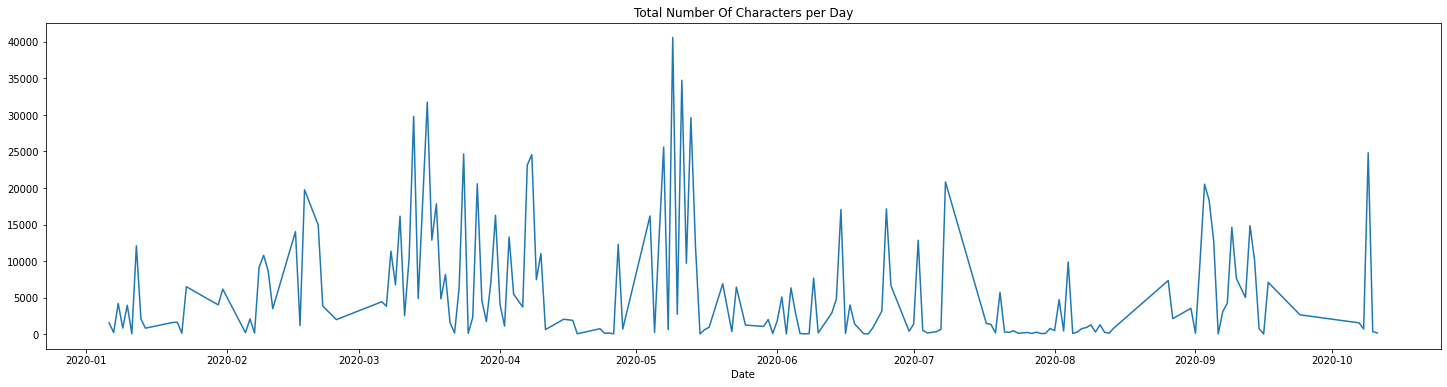

In [799]:
#@title
data.groupby('Date')['Message Length'].sum().plot(figsize=(25,6), title='Total Number Of Characters per Day')

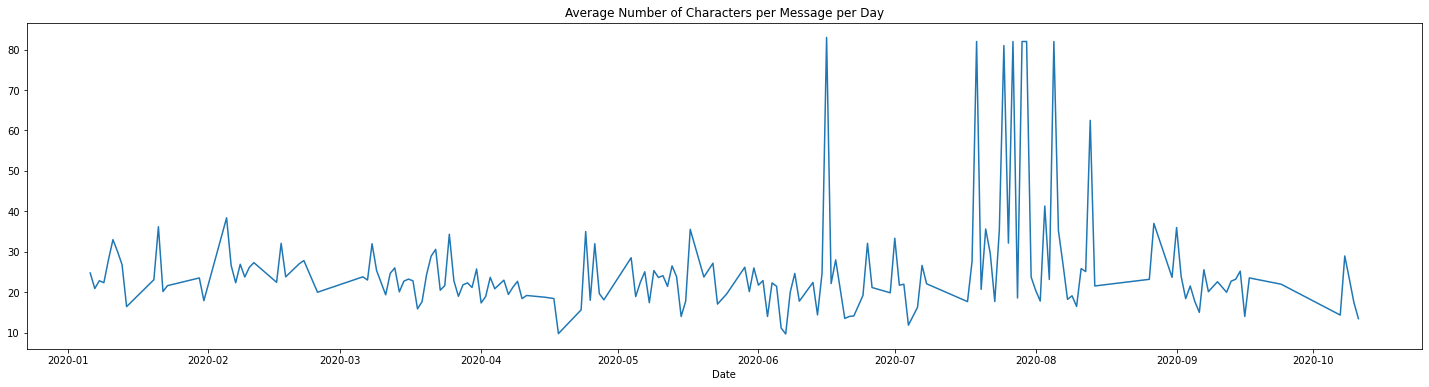

In [800]:
#@title
data.groupby('Date')['Message Length'].mean().plot(figsize=(25,6), title="Average Number of Characters per Message per Day")

In [ ]:
#@title
data['Reply Time'] = 0
for i in range(len(data)-2):
    data['Reply Time'][i+1] = datetime.datetime.combine(data['Date'][i+1],data['Time'][i+1]) - datetime.datetime.combine(data['Date'][i],data['Time'][i])


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0, flags=flags)


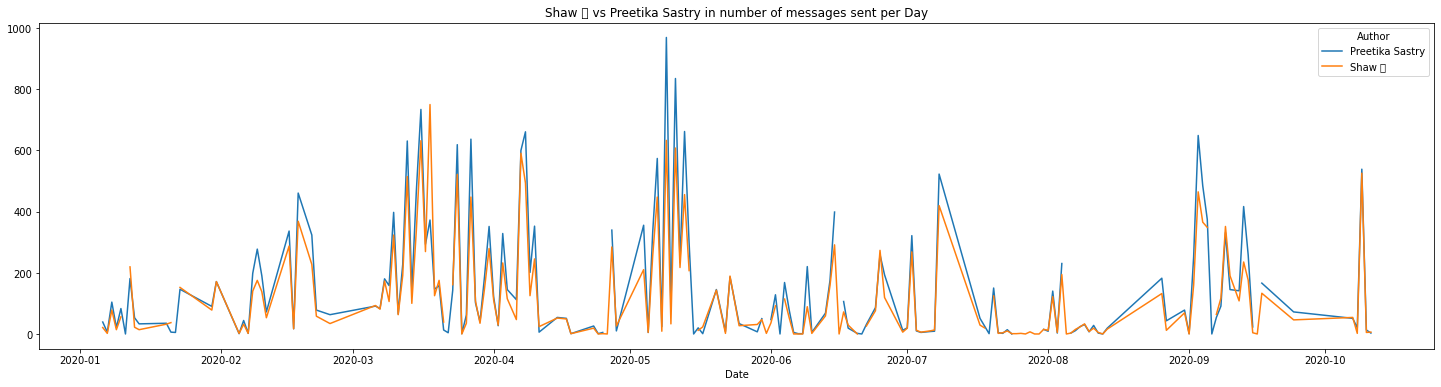

In [802]:
#@title
data.groupby(['Date','Author']).count()['Message'].unstack().plot(figsize=(25,6), title=names[0]+' vs '+names[1]+' in number of messages sent per Day')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0, flags=flags)


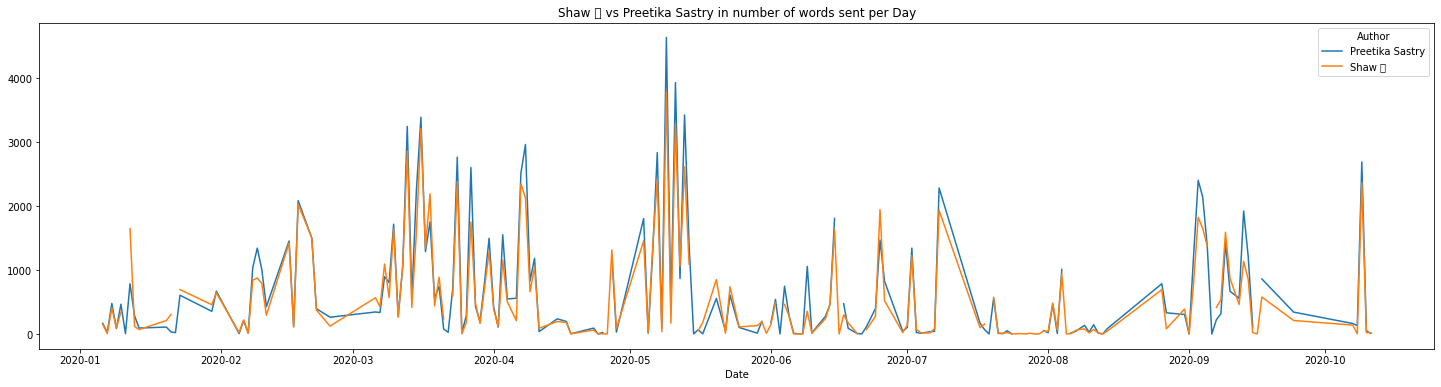

In [803]:
#@title
data.groupby(['Date','Author'])['Number of Words'].sum().unstack().plot(figsize=(25,6), title=names[0]+' vs '+names[1]+' in number of words sent per Day')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0, flags=flags)


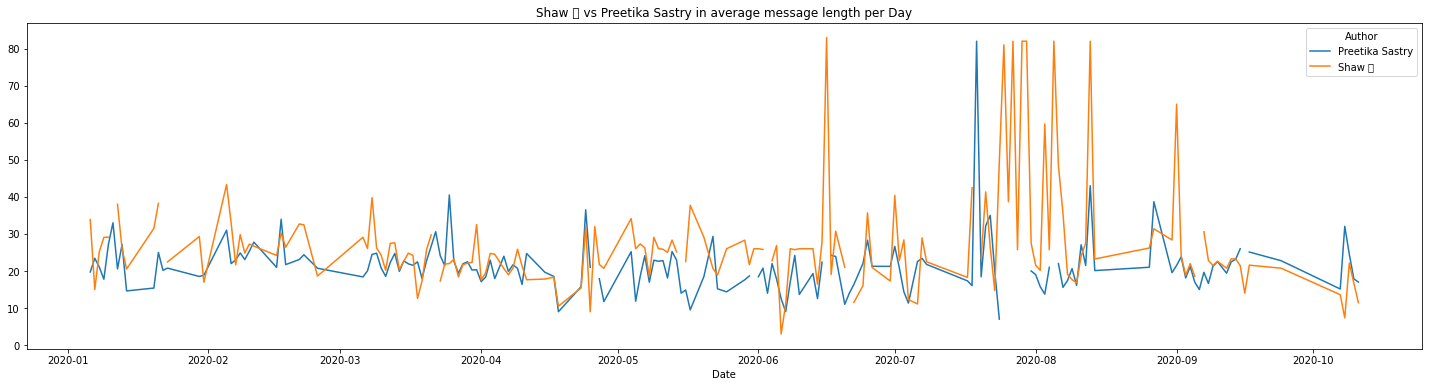

In [804]:
#@title
data.groupby(['Date','Author'])['Message Length'].mean().unstack().plot(figsize=(25,6), title=names[0]+' vs '+names[1]+' in average message length per Day')

In [ ]:
#@title
data['Reply Time'][0] = data['Reply Time'][1]
data['Reply Time'][len(data)-1] = data['Reply Time'][1]
data['Reply Time'] = data['Reply Time'].apply(lambda x: x.total_seconds())

In [806]:
#@title
data['Convo ID'] = (data['Reply Time'] > 1200).cumsum().fillna(0).astype(int) + 1

print('There are '+str(data['Convo ID'].max())+' unique conversations.')

There are 732 unique conversations.


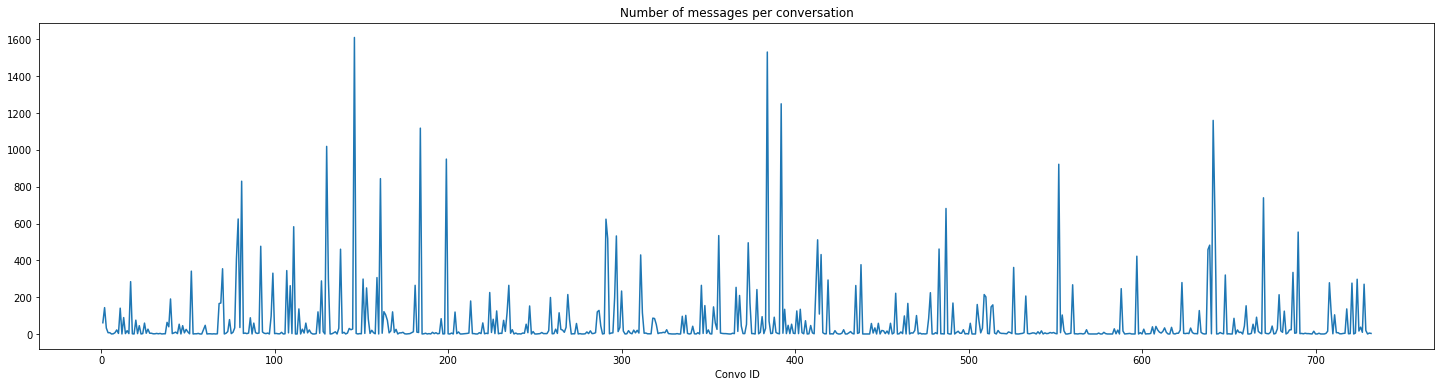

In [807]:
#@title
data.groupby(['Convo ID']).count()['Message'].plot(figsize=(25,6),title="Number of messages per conversation")

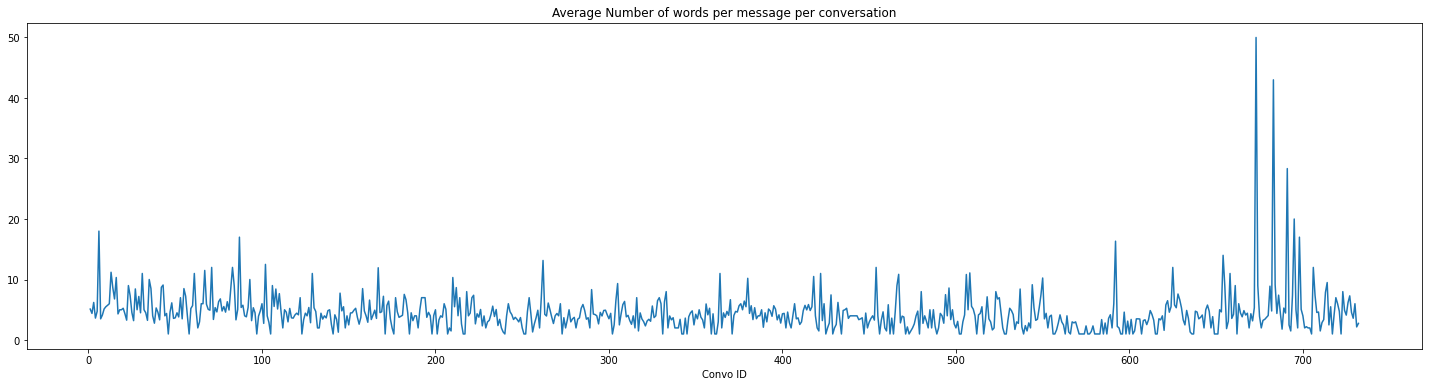

In [808]:
#@title
data.groupby(['Convo ID'])['Number of Words'].mean().plot(figsize=(25,6),title="Average Number of words per message per conversation")

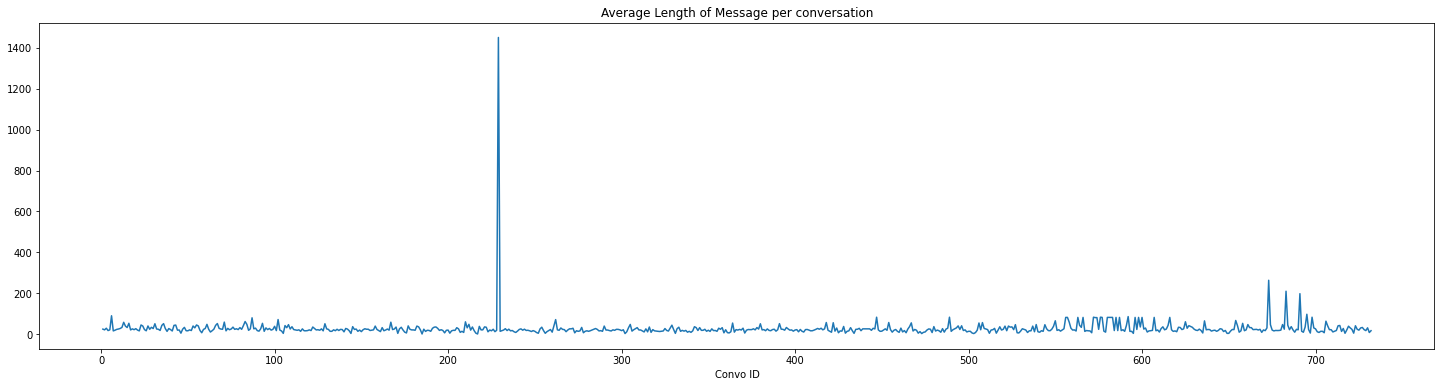

In [809]:
#@title
data.groupby(['Convo ID'])['Message Length'].mean().plot(figsize=(25,6),title="Average Length of Message per conversation")

In [810]:
#@title
xc = data[data['Convo ID'].between(200,250)]
record = xc[xc['Message Length'] == 2887]

In [811]:
#@title
print('This is that super long ass message:')
record

This is that super long ass message:


,Date,Time,Author,Message,Number of Words,Message Length,Reply Time,Convo ID
17059,2020-03-31,01:49:24,Shaw 🐣,preetikaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,2887,328.0,229


In [812]:
#@title
print("Your reply to all that effort :(")
xc[xc['Convo ID'] == 230].iloc[0].Message

Your reply to all that effort :(


'Wowww'

In [813]:
#@title
print('Average reply time for '+names[0]+' is {:.2f}'.format(data[data['Author'] == names[0]]['Reply Time'].mean()))
print('Average reply time for '+names[1]+' is {:.2f}'.format(data[data['Author'] == names[1]]['Reply Time'].mean()))

print('\n^^ This is not representative of the TRUE reply time, as it depends on how quickly replies are sent after a convo is over')

Average reply time for Shaw 🐣 is 624.16
Average reply time for Preetika Sastry is 437.46

^^ This is not representative of the TRUE reply time, as it depends on how quickly replies are sent after a convo is over


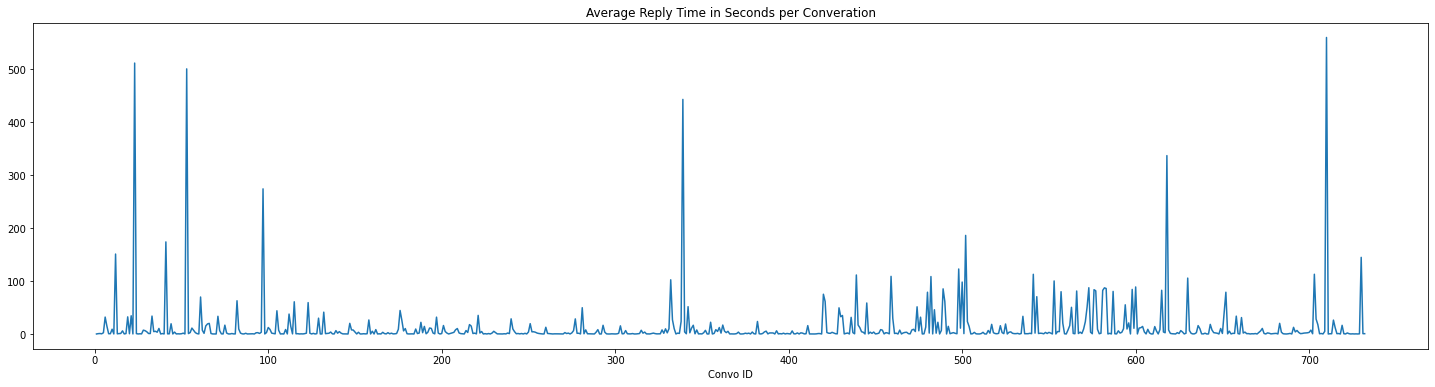

In [814]:
#@title
data.groupby('Convo ID')['Reply Time'].mean().div(1000).plot(figsize=(25,6), title='Average Reply Time in Seconds per Converation')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128035 missing from current font.
  font.set_text(s, 0, flags=flags)


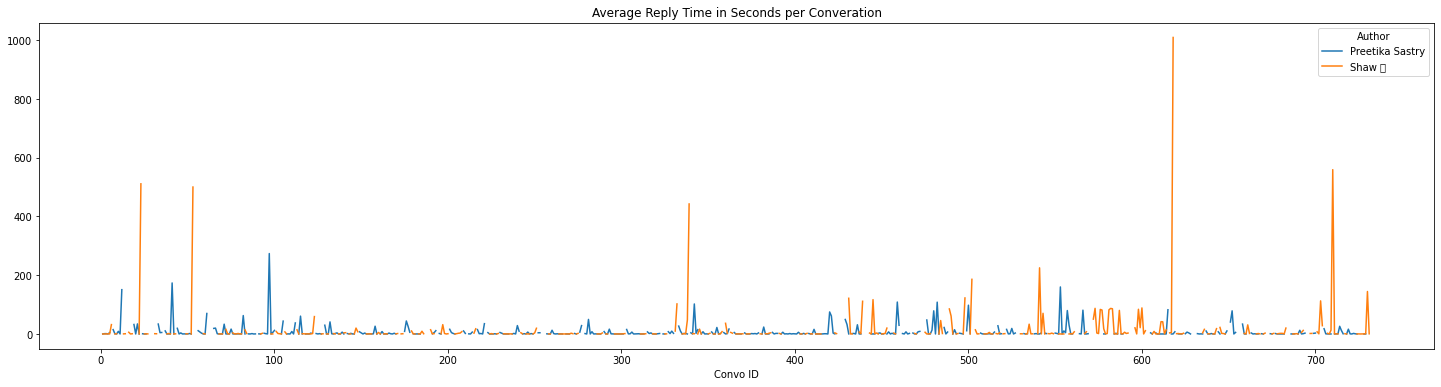

In [815]:
#@title
data.groupby(['Convo ID','Author'])['Reply Time'].mean().div(1000).unstack().plot(figsize=(25,6), title='Average Reply Time in Seconds per Converation')

In [816]:
#@title
data['Day of Week'] = data.Date.apply(lambda x: x.weekday())


[Text(0, 0, ''),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

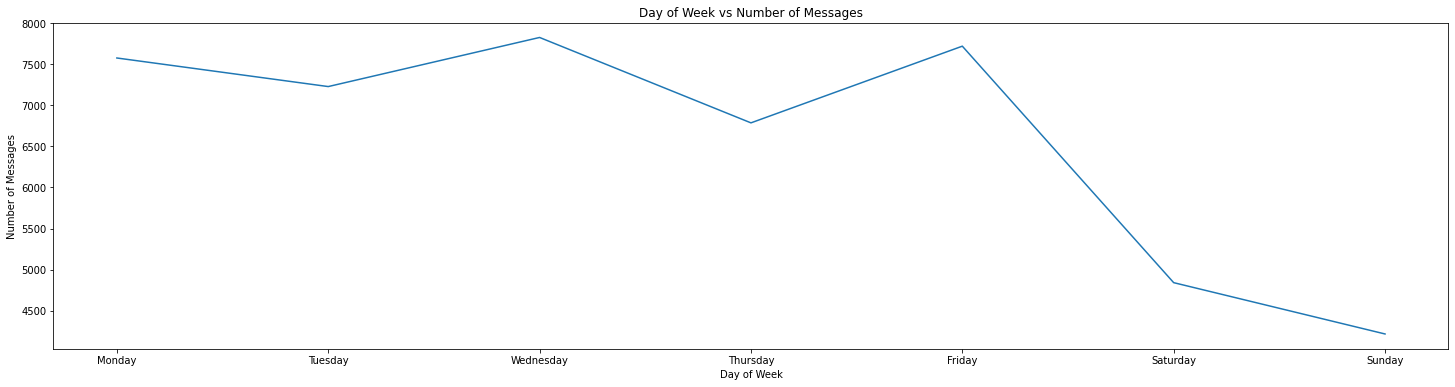

In [817]:
#@title
data.sort_values(by=['Day of Week']).groupby('Day of Week').count()['Message'].plot(figsize=(25,6), ylabel='Number of Messages', title='Day of Week vs Number of Messages').set_xticklabels(['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [818]:
#@title
data['Time2'] = data.Time.apply(lambda x: x.replace(second=0))
data['Time3'] = data.Time.apply(lambda x: x.replace(minute=0, second=0))

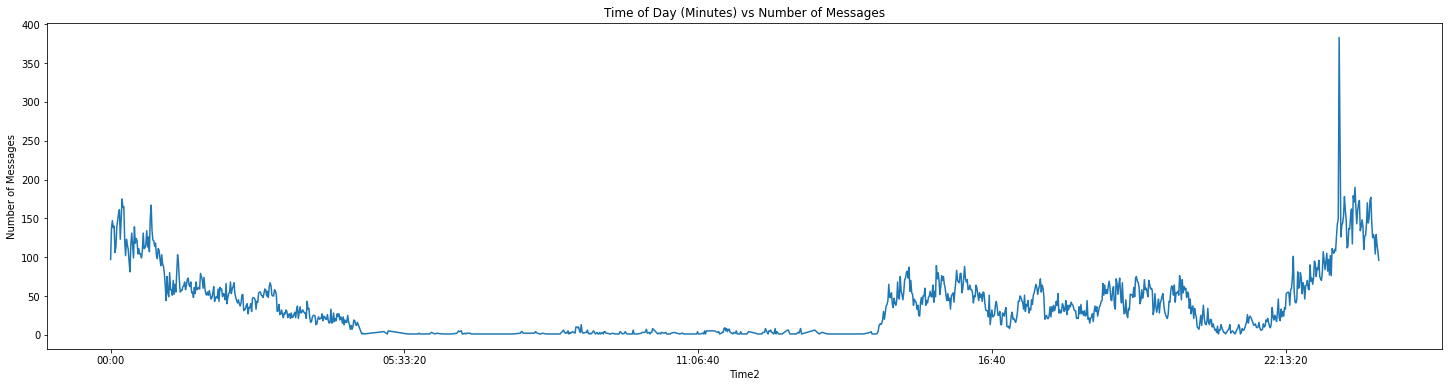

In [819]:
#@title
data.groupby(['Time2']).count()['Message'].plot(figsize=(25,6), ylabel='Number of Messages', title='Time of Day (Minutes) vs Number of Messages')

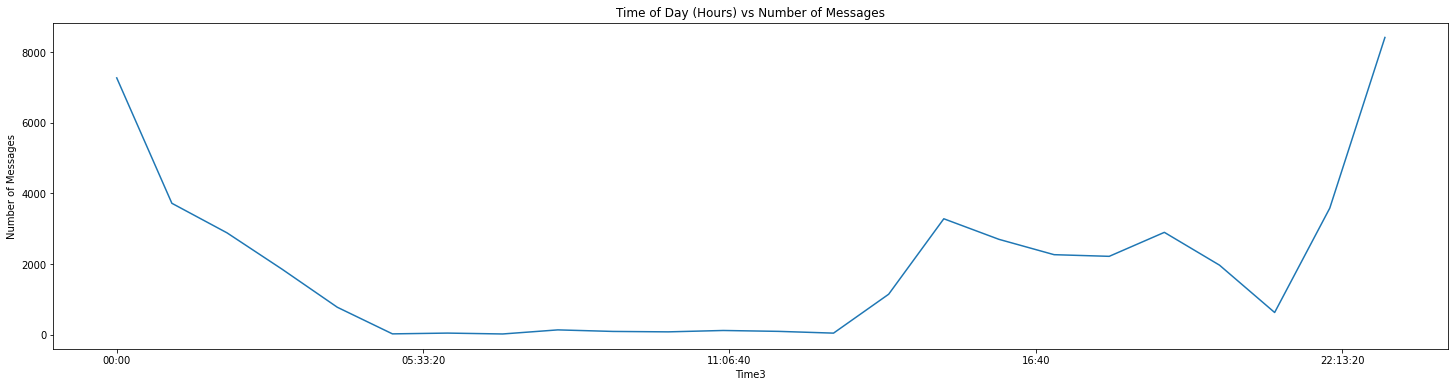

In [820]:
#@title
data.groupby(['Time3']).count()['Message'].plot(figsize=(25,6), ylabel='Number of Messages', title='Time of Day (Hours) vs Number of Messages')

In [821]:
#@title
print(names[0]+' has started {} conversations'.format(data.groupby('Convo ID').first()['Author'].value_counts()[0]))
print(names[1]+' has started {} conversations'.format(data.groupby('Convo ID').first()['Author'].value_counts()[1]))
print("")
print(names[0]+' said "bye" last in {} conversations'.format(data.groupby('Convo ID').last()['Author'].value_counts()[0]))
print(names[1]+' said "bye" last in {} conversations'.format(data.groupby('Convo ID').last()['Author'].value_counts()[1]))

Shaw 🐣 has started 387 conversations
Preetika Sastry has started 345 conversations

Shaw 🐣 said "bye" last in 428 conversations
Preetika Sastry said "bye" last in 304 conversations


In [ ]:
#@title
convo_starts = data.groupby('Convo ID').first()
convo_ends = data.groupby('Convo ID').last()
convo_dur = pd.concat([convo_starts,convo_ends]).drop_duplicates(keep=False).sort_values(['Date','Time']).reset_index()


convo_dur['Convo Time'] = 0
for i in range(len(convo_dur)-2):
    convo_dur['Convo Time'][i+1] = datetime.datetime.combine(convo_dur['Date'][i+1],convo_dur['Time'][i+1]) - datetime.datetime.combine(convo_dur['Date'][i],convo_dur['Time'][i])
convo_dur.drop([len(convo_dur)-1,len(convo_dur)-2], inplace=True)

convo_dur = convo_dur.iloc[1::2]

In [823]:
#@title
max_time = convo_dur['Convo Time'].max().seconds
print('Longest time chatted is: {}h {}m {}s'.format(max_time//3600,(max_time%3600)//60, max_time%60))

Longest time chatted is: 4h 19m 57s


In [824]:
#@title
avg_chat_length = sum(convo_dur['Convo Time'], datetime.timedelta(0)) / len(convo_dur['Convo Time'])
print('Average chat length is: {}h {}m {}s'.format(avg_chat_length.seconds//3600,(avg_chat_length.seconds%3600)//60, avg_chat_length.seconds%60))

print("\n^^ This is a naive calculation, and not truly representative of the true mean")

Average chat length is: 0h 19m 31s

^^ This is a naive calculation, and not truly representative of the true mean


In [ ]:
data

In [ ]:
drive.flush_and_unmount()